# This notebook will merge the IMDB data with the BOM gross movie data, then clean and analyze it

Additionally- merged the writer/director data to the basic information in imdb

In [1]:
import pandas as pd
import numpy as np

In [233]:
#import the two data sets
movie_gross_df = pd.read_csv('../data/zippedData/bom.movie_gross.csv.gz', compression = 'gzip')
title_basics_df = pd.read_csv('../data/zippedData/imdb.title.basics.csv.gz', compression = 'gzip')
# check the titles data set was read properly
title_basics_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [234]:
# check the movie gross data set was read properly
movie_gross_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [235]:
movie_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
title             3387 non-null object
studio            3382 non-null object
domestic_gross    3359 non-null float64
foreign_gross     2037 non-null object
year              3387 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [236]:
#fill any NaN genres with 'unknown', so that I can split the string of genres into a list
title_basics_df['genres'] = title_basics_df['genres'].fillna('unknown')

In [237]:
#checking that all NaNs are gone
title_basics_df['genres'].isna().sum()

0

In [238]:
#split genre strings into a list of genres
title_basics_df['genres'] = [x.split(',') for x in title_basics_df['genres']]

In [239]:
title_basics_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"[Action, Crime, Drama]"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"[Biography, Drama]"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,[Drama]
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"[Comedy, Drama]"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"[Comedy, Drama, Fantasy]"


In [240]:
movie_gross_df.loc[movie_gross_df['title'].str.contains('\(')].head(150)

,title,studio,domestic_gross,foreign_gross,year
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
10,Clash of the Titans (2010),WB,163200000.0,330000000,2010
55,A Nightmare on Elm Street (2010),WB (NL),63100000.0,52600000,2010
63,Aftershock (Tangshan Dadizhen),CL,63000.0,100200000,2010
79,If You Are the One 2 (Fei Cheng Wu Rao II),CL,427000.0,75600000,2010
...,...,...,...,...,...
1622,Left Behind (2014),Free,14000000.0,5700000,2014
1626,Sabotage (2014),ORF,10500000.0,7000000,2014
1636,Island of Lemurs: Madagascar (IMAX),WB,11300000.0,2800000,2014
1641,The Interview (2014),Sony,6100000.0,5200000,2014


In [241]:
title_basics_df.loc[title_basics_df['primary_title'].str.contains('Aftershock')]

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
7221,tt1393746,Aftershock,Tang shan da di zhen,2010,135.0,[Drama]
17221,tt1780762,Aftershock,Aftershock,2012,89.0,"[Action, Adventure, Horror]"
80948,tt4653172,Aftershocks: Earthquake in Haiti,Aftershocks: Earthquake in Haiti,2011,60.0,"[Documentary, News]"
112751,tt6615220,Cellular Aftershocks,Cellular Aftershocks,2017,90.0,[Documentary]
118719,tt7116248,Afterburn/Aftershock,Afterburn/Aftershock,2017,99.0,[Romance]


In [242]:
#remove all parentheticals from the movie_gross_df to allow more titles to match IMDB, which does not have years or original titles in parentheses

for row in movie_gross_df.index:
        if '('  in movie_gross_df['title'][row]:
            split = movie_gross_df['title'][row].split('(') 
            movie_gross_df['title'][row] = split[0]


/Users/cindyreiner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [243]:
movie_gross_df.head(10)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland,BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010
6,Iron Man 2,Par.,312400000.0,311500000,2010
7,Tangled,BV,200800000.0,391000000,2010
8,Despicable Me,Uni.,251500000.0,291600000,2010
9,How to Train Your Dragon,P/DW,217600000.0,277300000,2010


In [250]:
movie_gross_df['title_year'] = movie_gross_df['title'] + " (" + movie_gross_df['year'].astype(str) +")"
title_basics_df['title_year'] = title_basics_df['primary_title'] + " (" + title_basics_df['start_year'].astype(str) +")"

In [251]:
print(movie_gross_df.info())
title_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 6 columns):
title             3387 non-null object
studio            3382 non-null object
domestic_gross    3359 non-null float64
foreign_gross     2037 non-null object
year              3387 non-null int64
title_year        3387 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 158.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 7 columns):
tconst             146144 non-null object
primary_title      146144 non-null object
original_title     146123 non-null object
start_year         146144 non-null int64
runtime_minutes    114405 non-null float64
genres             146144 non-null object
title_year         146144 non-null object
dtypes: float64(1), int64(1), object(5)
memory usage: 7.8+ MB


In [245]:
combined_df = movie_gross_df.merge(title_basics_df, left_on = ['title', 'year'], right_on = ['primary_title', 'start_year'])

In [ ]:
comb

In [249]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1870 entries, 0 to 1869
Data columns (total 11 columns):
title              1870 non-null object
studio             1868 non-null object
domestic_gross     1860 non-null float64
foreign_gross      1278 non-null object
year               1870 non-null int64
tconst             1870 non-null object
primary_title      1870 non-null object
original_title     1870 non-null object
start_year         1870 non-null int64
runtime_minutes    1860 non-null float64
genres             1870 non-null object
dtypes: float64(2), int64(2), object(7)
memory usage: 175.3+ KB


In [246]:
combined_df[combined_df.duplicated(subset= ['title', 'year'], keep = False)]

,title,studio,domestic_gross,foreign_gross,year,tconst,primary_title,original_title,start_year,runtime_minutes,genres
41,The Bounty Hunter,Sony,67099999.0,69300000,2010,tt1038919,The Bounty Hunter,The Bounty Hunter,2010,110.0,"[Action, Comedy, Romance]"
42,The Bounty Hunter,Sony,67099999.0,69300000,2010,tt1472211,The Bounty Hunter,The Bounty Hunter,2010,NaN,[unknown]
56,Burlesque,SGem,39400000.0,50100000,2010,tt1126591,Burlesque,Burlesque,2010,119.0,"[Drama, Music, Musical]"
57,Burlesque,SGem,39400000.0,50100000,2010,tt1586713,Burlesque,Burlesque,2010,NaN,[Drama]
98,Leap Year,Uni.,25900000.0,6700000,2010,tt1216492,Leap Year,Leap Year,2010,100.0,"[Comedy, Romance]"
...,...,...,...,...,...,...,...,...,...,...,...
1817,Colette,BST,5100000.0,NaN,2018,tt9461382,Colette,Colette,2018,29.0,"[Documentary, Mystery]"
1851,The Guardians,MBox,177000.0,NaN,2018,tt7348082,The Guardians,The Guardians,2018,104.0,[Documentary]
1852,The Guardians,MBox,177000.0,NaN,2018,tt8150132,The Guardians,The Guardians,2018,70.0,[Documentary]
1857,The Negotiation,CJ,111000.0,NaN,2018,tt6904272,The Negotiation,The Negotiation,2018,114.0,"[Action, Crime, Thriller]"


In [248]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1870 entries, 0 to 1869
Data columns (total 11 columns):
title              1870 non-null object
studio             1868 non-null object
domestic_gross     1860 non-null float64
foreign_gross      1278 non-null object
year               1870 non-null int64
tconst             1870 non-null object
primary_title      1870 non-null object
original_title     1870 non-null object
start_year         1870 non-null int64
runtime_minutes    1860 non-null float64
genres             1870 non-null object
dtypes: float64(2), int64(2), object(7)
memory usage: 175.3+ KB


In [14]:
combined_df.drop_duplicates(subset= ['title', 'year'], inplace = True)

In [15]:
combined_df

,title,studio,domestic_gross,foreign_gross,year,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,Toy Story 3,BV,415000000.0,652000000,2010,tt0435761,Toy Story 3,Toy Story 3,2010,103.0,"[Adventure, Animation, Comedy]"
1,Inception,WB,292600000.0,535700000,2010,tt1375666,Inception,Inception,2010,148.0,"[Action, Adventure, Sci-Fi]"
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,tt0892791,Shrek Forever After,Shrek Forever After,2010,93.0,"[Adventure, Animation, Comedy]"
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,tt1325004,The Twilight Saga: Eclipse,The Twilight Saga: Eclipse,2010,124.0,"[Adventure, Drama, Fantasy]"
4,Iron Man 2,Par.,312400000.0,311500000,2010,tt1228705,Iron Man 2,Iron Man 2,2010,124.0,"[Action, Adventure, Sci-Fi]"
...,...,...,...,...,...,...,...,...,...,...,...
1868,Girls vs Gangsters,WGUSA,37100.0,NaN,2018,tt7870578,Girls vs Gangsters,Gui mi 2,2018,120.0,"[Comedy, Drama]"
1869,The Workshop,Strand,22100.0,NaN,2018,tt7405478,The Workshop,The Workshop,2018,80.0,[Thriller]
1870,A Paris Education,KL,21600.0,NaN,2018,tt6593240,A Paris Education,Mes provinciales,2018,137.0,[Drama]
1871,The Quake,Magn.,6200.0,NaN,2018,tt6523720,The Quake,Skjelvet,2018,106.0,"[Action, Drama, Thriller]"


In [16]:
title_rating_df = pd.read_csv('../data/zippedData/imdb.title.ratings.csv.gz', compression = 'gzip')

In [17]:
combined_df = combined_df.merge(title_rating_df, on = ['tconst'])

In [18]:
combined_df.head()

,title,studio,domestic_gross,foreign_gross,year,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,Toy Story 3,BV,415000000.0,652000000,2010,tt0435761,Toy Story 3,Toy Story 3,2010,103.0,"[Adventure, Animation, Comedy]",8.3,682218
1,Inception,WB,292600000.0,535700000,2010,tt1375666,Inception,Inception,2010,148.0,"[Action, Adventure, Sci-Fi]",8.8,1841066
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,tt0892791,Shrek Forever After,Shrek Forever After,2010,93.0,"[Adventure, Animation, Comedy]",6.3,167532
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,tt1325004,The Twilight Saga: Eclipse,The Twilight Saga: Eclipse,2010,124.0,"[Adventure, Drama, Fantasy]",5.0,211733
4,Iron Man 2,Par.,312400000.0,311500000,2010,tt1228705,Iron Man 2,Iron Man 2,2010,124.0,"[Action, Adventure, Sci-Fi]",7.0,657690


In [19]:
combined_df.drop(columns=['original_title', 'primary_title', 'start_year'], inplace = True)

In [20]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1822 entries, 0 to 1821
Data columns (total 10 columns):
title              1822 non-null object
studio             1820 non-null object
domestic_gross     1812 non-null float64
foreign_gross      1252 non-null object
year               1822 non-null int64
tconst             1822 non-null object
runtime_minutes    1821 non-null float64
genres             1822 non-null object
averagerating      1822 non-null float64
numvotes           1822 non-null int64
dtypes: float64(3), int64(2), object(5)
memory usage: 156.6+ KB


In [21]:
type(combined_df['genres'][0])

list

In [22]:
import seaborn as sns

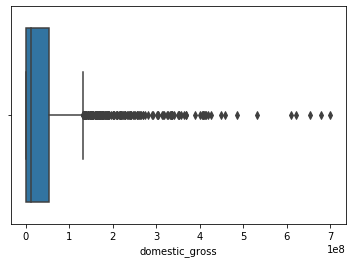

In [23]:
sns.boxplot(combined_df['domestic_gross'])

In [24]:
combined_df['domestic_gross'].describe()

count    1.812000e+03
mean     4.303059e+07
std      7.758989e+07
min      3.000000e+02
25%      5.797500e+05
50%      1.070000e+07
75%      5.255000e+07
max      7.001000e+08
Name: domestic_gross, dtype: float64

In [25]:
combined_df['domestic_gross'].median()

10700000.0

In [26]:
top_half = combined_df[combined_df['domestic_gross'] > 10700000]
bottom_half = combined_df[combined_df['domestic_gross'] < 10700000]

In [27]:
top_quintile = combined_df[combined_df['domestic_gross'] >= 53000000]

In [28]:
top_quintile.describe()

,domestic_gross,year,runtime_minutes,averagerating,numvotes
count,4.520000e+02,452.000000,452.000000,452.000000,4.520000e+02
mean,1.399135e+08,2013.787611,114.236726,6.673230,2.468388e+05
std,1.048486e+08,2.539100,18.516827,0.925933,2.214829e+05
min,5.300000e+07,2010.000000,80.000000,1.600000,6.867000e+03
25%,6.942500e+07,2012.000000,100.000000,6.200000,9.305350e+04
50%,1.022500e+08,2014.000000,112.000000,6.700000,1.851740e+05
75%,1.692250e+08,2016.000000,126.250000,7.300000,3.440928e+05
max,7.001000e+08,2018.000000,180.000000,8.800000,1.841066e+06


In [29]:
top_half.describe()

,domestic_gross,year,runtime_minutes,averagerating,numvotes
count,9.050000e+02,905.000000,905.000000,905.000000,9.050000e+02
mean,8.439105e+07,2013.874033,110.758011,6.494033,1.662973e+05
std,9.291317e+07,2.574045,17.645727,0.953039,1.852033e+05
min,1.080000e+07,2010.000000,46.000000,1.600000,2.400000e+01
25%,2.790000e+07,2012.000000,98.000000,5.900000,4.881200e+04
50%,5.270000e+07,2014.000000,108.000000,6.500000,1.023690e+05
75%,1.021000e+08,2016.000000,121.000000,7.200000,2.135420e+05
max,7.001000e+08,2018.000000,180.000000,8.800000,1.841066e+06


In [30]:
bottom_half.describe()

,domestic_gross,year,runtime_minutes,averagerating,numvotes
count,9.030000e+02,903.000000,902.000000,903.000000,903.000000
mean,1.721742e+06,2014.104097,111.345898,6.345404,20036.405316
std,2.403501e+06,2.440470,21.469646,1.038312,27646.400602
min,3.000000e+02,2010.000000,40.000000,1.600000,12.000000
25%,1.040000e+05,2012.000000,96.000000,5.700000,2842.500000
50%,5.690000e+05,2014.000000,107.000000,6.400000,9231.000000
75%,2.400000e+06,2016.000000,124.000000,7.100000,26998.500000
max,1.050000e+07,2018.000000,189.000000,8.800000,197684.000000


In [31]:
def creategenreinfoDF(dataframe):  
    return fillgenres(creategenrecols(genrelistfromDF(dataframe), genreDF(dataframe)), genrelistfromDF(dataframe))

def fillgenres(dataframe, _list):
    for row in dataframe.index:
        for genre in _list:
            if genre in dataframe['genres'][row]:
                dataframe[genre][row]  = 1
    return dataframe

def creategenrecols(_list, dataframe):
    for col in _list:
        dataframe[col] = 0
    return dataframe
    
def genrelistfromDF(dataframe):
    #create and return a list of genres present in the arguement
    genre_list = []
    for row in dataframe['genres']:
        for item in row:
            genre_list.append(item)
    genre_list = sorted(list(set(genre_list)))
    return genre_list

    
def genreDF(dataframe):
    #create and return a dataframe from the genres series of the arguement
    genre_df = pd.DataFrame(dataframe['genres'])
    return genre_df

In [32]:
bottom_half_genres = creategenreinfoDF(bottom_half)
top_half_genres = creategenreinfoDF(top_half)
top_quintile_genres = creategenreinfoDF(top_quintile)

/Users/cindyreiner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [33]:
bottom_half_genres.drop(columns = ['genres'], inplace = True)
top_half_genres.drop(columns = ['genres'], inplace = True)
top_quintile_genres.drop(columns = ['genres'], inplace = True)

In [34]:
bottom_half_genres.sum()

Action         209
Adventure       72
Animation       25
Biography      104
Comedy         294
Crime          131
Documentary     84
Drama          555
Family          20
Fantasy         38
History         43
Horror          55
Music           34
Musical          8
Mystery         57
News             1
Romance        182
Sci-Fi          20
Sport           15
Thriller       125
War             18
Western          6
dtype: int64

In [35]:
bottom_number = pd.DataFrame(bottom_half_genres.sum(), columns=['number_of_movies'])
top_number = pd.DataFrame(top_half_genres.sum(), columns=['number_of_movies'])
top_quint_number = pd.DataFrame(top_quintile_genres.sum(), columns=['number_of_movies'])

In [36]:
import matplotlib.pyplot as plt

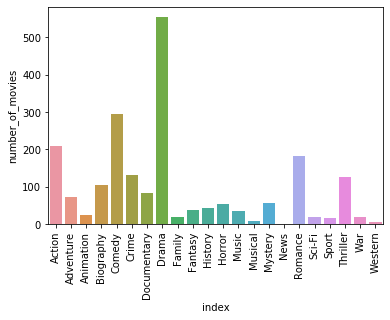

In [37]:
plt.xticks(rotation=90)
sns.barplot(data = bottom_number.reset_index(), x = 'index', y = 'number_of_movies')

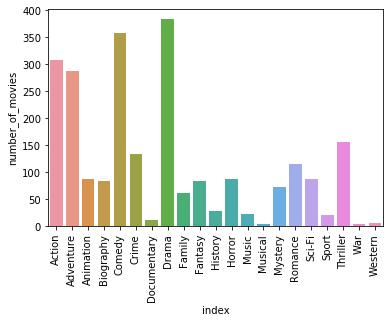

In [38]:
plt.xticks(rotation=90)
sns.barplot(data = top_number.reset_index(), x = 'index', y = 'number_of_movies')

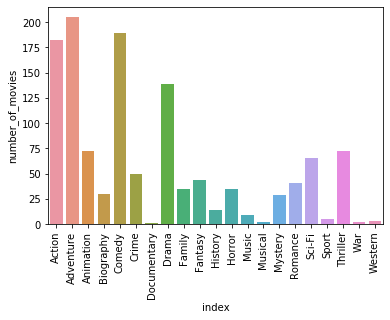

In [39]:
plt.xticks(rotation=90)
sns.barplot(data = top_quint_number.reset_index(), x = 'index', y = 'number_of_movies')

In [40]:
genres_df = bottom_number.reset_index().merge(top_number.reset_index(), on = 'index', suffixes = ('_bottom', '_top'))

In [41]:
genres_df['total_movies'] = genres_df['number_of_movies_bottom'] + genres_df['number_of_movies_top']

In [42]:
genres_df.head()

,index,number_of_movies_bottom,number_of_movies_top,total_movies
0,Action,209,308,517
1,Adventure,72,288,360
2,Animation,25,88,113
3,Biography,104,83,187
4,Comedy,294,358,652


In [43]:
genres_df = genres_df.reset_index().merge(top_quint_number.reset_index(), on = 'index', suffixes = ('', '_top_quint'))

In [44]:
genres_df.head()

,level_0,index,number_of_movies_bottom,number_of_movies_top,total_movies,number_of_movies
0,0,Action,209,308,517,182
1,1,Adventure,72,288,360,205
2,2,Animation,25,88,113,72
3,3,Biography,104,83,187,30
4,4,Comedy,294,358,652,189


In [45]:
genres_df['percent_top_half'] = genres_df['number_of_movies_top']/(genres_df['total_movies'])
genres_df['percent_top_quint'] = genres_df['number_of_movies']/genres_df['total_movies']

In [46]:
genres_df.head()

,level_0,index,number_of_movies_bottom,number_of_movies_top,total_movies,number_of_movies,percent_top_half,percent_top_quint
0,0,Action,209,308,517,182,0.595745,0.352031
1,1,Adventure,72,288,360,205,0.800000,0.569444
2,2,Animation,25,88,113,72,0.778761,0.637168
3,3,Biography,104,83,187,30,0.443850,0.160428
4,4,Comedy,294,358,652,189,0.549080,0.289877


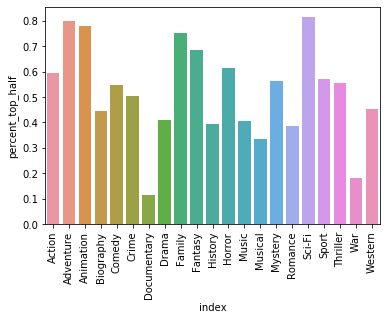

In [47]:
plt.xticks(rotation=90)
sns.barplot(data = genres_df, x = 'index', y = 'percent_top_half')

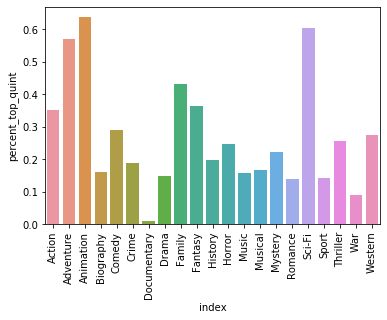

In [48]:
plt.xticks(rotation=90)
sns.barplot(data = genres_df, x = 'index', y = 'percent_top_quint')

From this, I would recommend starting with a movie in the Adventure, Animation &/or SciFi genres, now I'd like to investigate which writers and directors do the best in these genres

In [ ]:
#narrow the datasets to those including Adventure, Animation or SciFi in their genre list

In [183]:
top_quintile.head()

,title,studio,domestic_gross,foreign_gross,year,tconst,runtime_minutes,genres,averagerating,numvotes
0,Toy Story 3,BV,415000000.0,652000000,2010,tt0435761,103.0,"[Adventure, Animation, Comedy]",8.3,682218
1,Inception,WB,292600000.0,535700000,2010,tt1375666,148.0,"[Action, Adventure, Sci-Fi]",8.8,1841066
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,tt0892791,93.0,"[Adventure, Animation, Comedy]",6.3,167532
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,tt1325004,124.0,"[Adventure, Drama, Fantasy]",5.0,211733
4,Iron Man 2,Par.,312400000.0,311500000,2010,tt1228705,124.0,"[Action, Adventure, Sci-Fi]",7.0,657690


In [208]:
top_quintile['genres'].head()

0    [Adventure, Animation, Comedy]
1       [Action, Adventure, Sci-Fi]
2    [Adventure, Animation, Comedy]
3       [Adventure, Drama, Fantasy]
4       [Action, Adventure, Sci-Fi]
Name: genres, dtype: object

In [49]:
title_crew_df = pd.read_csv('../data/zippedData/imdb.title.crew.csv.gz', compression = 'gzip')
title_crew_df.head()

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


In [50]:
title_basics_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"[Action, Crime, Drama]"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"[Biography, Drama]"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,[Drama]
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"[Comedy, Drama]"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"[Comedy, Drama, Fantasy]"


In [51]:
name_basics_df = pd.read_csv('../data/zippedData/imdb.name.basics.csv.gz', compression = 'gzip')
name_basics_df.head()

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


In [52]:
print(len(title_crew_df))
print(len(title_basics_df))

146144
146144


In [53]:
imdb_crew_basics_df = title_basics_df.merge(title_crew_df, on = 'tconst')
imdb_crew_basics_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,directors,writers
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"[Action, Crime, Drama]",nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"[Biography, Drama]",nm0002411,NaN
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,[Drama],nm0000080,"nm0000080,nm0462648"
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"[Comedy, Drama]",nm0611531,nm0347899
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"[Comedy, Drama, Fantasy]","nm0765384,nm0749914","nm1360635,nm0749914"


In [54]:
imdb_crew_basics_df.shape

(146144, 8)

In [55]:
imdb_crew_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146144 entries, 0 to 146143
Data columns (total 8 columns):
tconst             146144 non-null object
primary_title      146144 non-null object
original_title     146123 non-null object
start_year         146144 non-null int64
runtime_minutes    114405 non-null float64
genres             146144 non-null object
directors          140417 non-null object
writers            110261 non-null object
dtypes: float64(1), int64(1), object(6)
memory usage: 10.0+ MB


In [57]:
#filling NaN values for directors and writers with 'unknown'
imdb_crew_basics_df['directors'] = imdb_crew_basics_df['directors'].fillna('unknown')
imdb_crew_basics_df['writers'] = imdb_crew_basics_df['writers'].fillna('unknown')

In [58]:
imdb_crew_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146144 entries, 0 to 146143
Data columns (total 8 columns):
tconst             146144 non-null object
primary_title      146144 non-null object
original_title     146123 non-null object
start_year         146144 non-null int64
runtime_minutes    114405 non-null float64
genres             146144 non-null object
directors          146144 non-null object
writers            146144 non-null object
dtypes: float64(1), int64(1), object(6)
memory usage: 10.0+ MB


In [60]:
#join writer/director names with imdb_crew_basics
#first separate writer & director columns into lists
imdb_crew_basics_df['directors'] = [x.split(',') for x in imdb_crew_basics_df['directors']]
imdb_crew_basics_df['writers'] = [x.split(',') for x in imdb_crew_basics_df['writers']]

In [ ]:
#checking length of lists of directors
[len(x) for x in imdb_crew_basics_df['directors']]

In [174]:
imdb_crew_basics_df['dir_names'] = 'unknown'
for row in imdb_crew_basics_df.index:
    dir_name_list = []
    for name in imdb_crew_basics_df['directors'][row]:
        if name != 'unknown':
            director = name_basics_df[name_basics_df['nconst'].str.match(name)].reset_index()
            dir_name_list.append(director['primary_name'][0])
    imdb_crew_basics_df.reset_index
    imdb_crew_basics_df['dir_names'][row] = dir_name_list
            

/Users/cindyreiner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


KeyboardInterrupt: 

In [162]:
imdb_crew_basics_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,directors,writers,dir_names
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"[Action, Crime, Drama]",[nm0712540],"[nm0023551, nm1194313, nm0347899, nm1391276]",[Harnam Singh Rawail]
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"[Biography, Drama]",[nm0002411],[unknown],[Mani Kaul]
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,[Drama],[nm0000080],"[nm0000080, nm0462648]",[Orson Welles]
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"[Comedy, Drama]",[nm0611531],[nm0347899],[Hrishikesh Mukherjee]
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"[Comedy, Drama, Fantasy]","[nm0765384, nm0749914]","[nm1360635, nm0749914]","[Valeria Sarmiento, Raoul Ruiz]"


In [169]:
#check dir_names are correct
name_basics_df[name_basics_df['nconst'].str.contains('nm0749914')]

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
40035,nm0749914,Raoul Ruiz,1941.0,2011.0,"director,writer,producer","tt0417871,tt0084824,tt1236371,tt0100275"


In [175]:
imdb_crew_basics_df[imdb_crew_basics_df['primary_title'].str.contains('Star Wars')]

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,directors,writers,dir_names
2370,tt10239898,Star Wars: Battle for the Holocrons,Star Wars: Battle for the Holocrons,2020,NaN,"[Action, Adventure, Fantasy]",[nm2737823],[nm10646217],unknown
2947,tt10300394,Untitled Star Wars Film,Untitled Star Wars Film,2022,NaN,[unknown],[unknown],[unknown],unknown
2948,tt10300396,Untitled Star Wars Film,Untitled Star Wars Film,2024,NaN,[unknown],[unknown],[unknown],unknown
2949,tt10300398,Untitled Star Wars Film,Untitled Star Wars Film,2026,NaN,[Fantasy],[unknown],[unknown],unknown
3219,tt10321138,RiffTrax: Star Wars: The Force Awakens,RiffTrax: Star Wars: The Force Awakens,2016,NaN,[Comedy],[unknown],"[nm4571467, nm0625621, nm4571481]",unknown
34425,tt2275656,Star Wars: Threads of Destiny,Star Wars: Threads of Destiny,2014,110.0,"[Action, Adventure, Sci-Fi]",[nm2339469],"[nm5166168, nm5165119, nm5165990, nm5166844, n...",unknown
41443,tt2488496,Star Wars: Episode VII - The Force Awakens,Star Wars: Episode VII - The Force Awakens,2015,136.0,"[Action, Adventure, Fantasy]",[nm0009190],"[nm0001410, nm0009190, nm1578335, nm0000184]",unknown
42223,tt2527336,Star Wars: The Last Jedi,Star Wars: Episode VIII - The Last Jedi,2017,152.0,"[Action, Adventure, Fantasy]",[nm0426059],"[nm0426059, nm0000184]",unknown
42224,tt2527338,Star Wars: The Rise of Skywalker,Star Wars: The Rise of Skywalker,2019,NaN,"[Action, Adventure, Fantasy]",[nm0009190],"[nm0009190, nm0006516, nm0000184, nm1119880, n...",unknown
63494,tt3648510,Plastic Galaxy: The Story of Star Wars Toys,Plastic Galaxy: The Story of Star Wars Toys,2014,70.0,"[Documentary, History, Sci-Fi]",[nm2520673],[nm2520673],unknown
